In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [44]:
TINY_SIZE = 14
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20
sns.set(style="darkgrid")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": BIGGER_SIZE,
    "axes.labelsize": MEDIUM_SIZE,
    "axes.titlesize": BIGGER_SIZE,
    "xtick.labelsize": TINY_SIZE, 
    "ytick.labelsize": TINY_SIZE, 
    "legend.fontsize": TINY_SIZE, 
    "figure.titlesize": BIGGER_SIZE, 
})

In [45]:
data_exp_0 = pd.read_csv("../data_teachers/ToySGD/exponential_decay/0/Ackley/aggregated_run_data.csv")
data_step_0 = pd.read_csv("../data_teachers/ToySGD/step_decay/0/Ackley/aggregated_run_data.csv")
data_step_1 = pd.read_csv("../data_teachers/ToySGD/step_decay/1/Ackley/aggregated_run_data.csv")
data_step_2 = pd.read_csv("../data_teachers/ToySGD/step_decay/2/Ackley/aggregated_run_data.csv")
data_step_3 = pd.read_csv("../data_teachers/ToySGD/step_decay/3/Ackley/aggregated_run_data.csv")
data_step_4 = pd.read_csv("../data_teachers/ToySGD/step_decay/4/Ackley/aggregated_run_data.csv")
data_sgdr_0 = pd.read_csv("../data_teachers/ToySGD/sgdr/0/Ackley/aggregated_run_data.csv")
data_const_0 = pd.read_csv("../data_teachers/ToySGD/constant/0/Ackley/aggregated_run_data.csv")

data_all = [data_step_0, data_step_1, data_step_2, data_step_3, data_step_4, data_exp_0, data_sgdr_0, data_const_0]
data_homo = [data_step_0, data_step_1, data_step_2, data_step_3, data_step_4,]
data_homo_labels = ["", 1, 2, 3, 4]
data_hetero = [data_const_0, data_exp_0, data_sgdr_0, data_step_0]
data_hetero_labels = ["Constant", "Exponential Decay", "SGDR", "Step Decay"]

for data in data_all:
    data["action"] = data["action"].map(lambda x: 10**x)

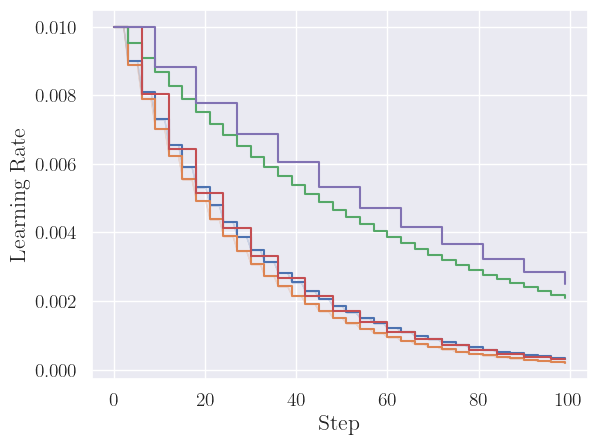

In [46]:
# Create homogeneous plot:
for label, data in zip(data_homo_labels, data_homo):
    ax = sns.lineplot(
            data=data,
            x="batch",
            y="action",
            drawstyle="steps-post",
            label=label,
            legend=False
        )
ax.set_xlabel("Step")
ax.set_ylabel("Learning Rate")
plt.ticklabel_format(axis="y", style="sci")
save_path = Path("figures", "homo_teachers")
save_path.mkdir(parents=True, exist_ok=True)
plt.savefig(save_path / "step.pdf", bbox_inches="tight")
plt.show()

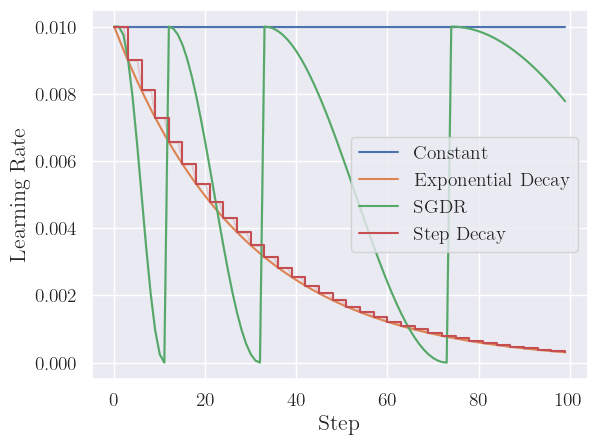

In [47]:
# Create heterogeneous plot:
for label, data in zip(data_hetero_labels, data_hetero):
    drawstyle = "steps-post" if label == "Step Decay" else "default"
    ax = sns.lineplot(
            data=data,
            x="batch",
            y="action",
            drawstyle=drawstyle,
            label=label,
        )
ax.set_xlabel("Step")
ax.set_ylabel("Learning Rate")
plt.ticklabel_format(axis="y", style="sci")
save_path = Path("figures", "hetero_teachers")
save_path.mkdir(parents=True, exist_ok=True)
plt.savefig(save_path / "all.pdf", bbox_inches="tight")
plt.show()